# Importacion de base de datos actualizada

In [1]:
import wget
import pandas as pd
#datos covid19 - mundo
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
wget.download(url, 'covid.csv')
Xd = pd.read_csv('covid.csv')
Xd

-1 / unknown

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,23,23,23,23,23,24,24,24,24,24
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,103,103,103,104,104,104,104,105,106,106
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002


# Datos Colombia

# Reporte de casos acumulados por dia 

**Datos tipo Serie.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
ii = Xd[Xd.columns[1]] == 'Colombia'

print(np.where(ii)[0][0])
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])

82


**Datos tipo numpy.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#funcion ventaneo
def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf+1].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf+1].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N

**Acumulados y contagiados por día.**

In [4]:
ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))
#serie_d = np.append(0,np.cumsum(np.diff(serie)))
X,y = covid_win(serie,w=5)
X_d,y_d = covid_win(serie_d,w=5)

In [5]:
figsize=[18,4]
title_acum='Acumulado de contagios'
title_day='Contagiados por dia'

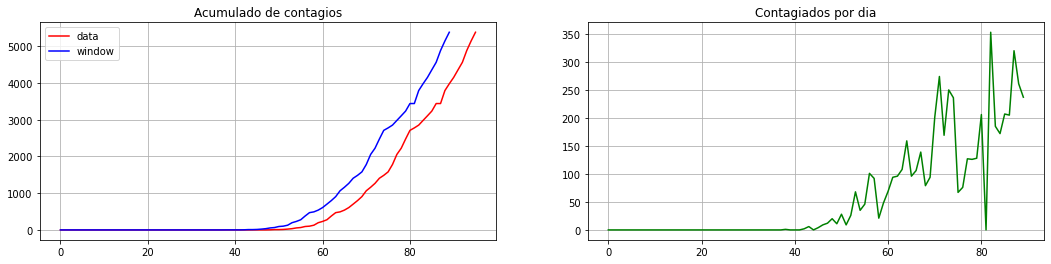

In [6]:
plt.figure(figsize=figsize)

plt.subplot(121)
plt.plot(serie,'r',label='data')
plt.plot(y,'b',label='window')
plt.legend()
plt.title(title_acum)
plt.grid()

plt.subplot(122)
plt.plot(y_d,'g')
plt.title(title_day)
plt.grid()

# Entrenamiento de regresor para covid 19 - Colombia

## Análisis exploratorio - visualización en 2D PCA 

Text(0.5, 1.0, 'Contagiados por dia')

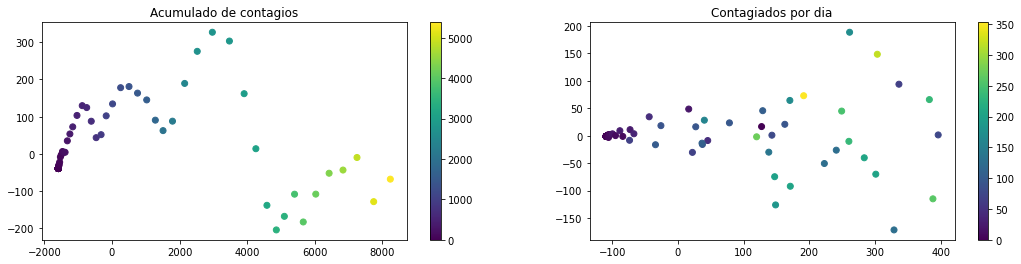

In [7]:
from sklearn.decomposition import PCA

red_PCA = PCA (n_components=2)
red_d_PCA = PCA(n_components=2)

z_PCA = red_PCA.fit_transform(X)
z_d_PCA = red_d_PCA.fit_transform(X_d)

plt.figure(figsize=figsize)

plt.subplot(121)
plt.scatter(z_PCA[:,0],z_PCA[:,1],c=y)
plt.colorbar()
plt.title(title_acum)

plt.subplot(122)
plt.scatter(z_d_PCA[:,0],z_d_PCA[:,1],c=y_d)
plt.colorbar()
plt.title(title_day)

## Análisis exploratorio - visualización en 2D TSE

Text(0.5, 1.0, 'Contagiados por dia')

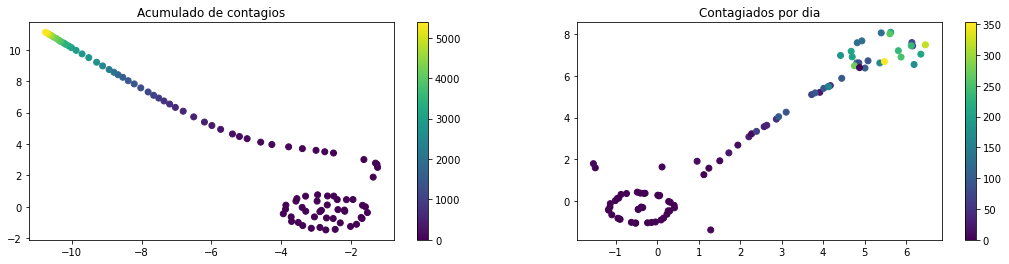

In [8]:
from sklearn.manifold import TSNE

perplexity=20

red_TSNE = TSNE(n_components = 2, perplexity=perplexity)
red_d_TSNE = TSNE(n_components = 2, perplexity=perplexity)

z_TSNE = red_TSNE.fit_transform(X)
z_d_TSNE = red_d_TSNE.fit_transform(X_d)

plt.figure(figsize=figsize)

plt.subplot(121)
plt.scatter(z_TSNE[:,0],z_TSNE[:,1],c=y)
plt.colorbar()
plt.title(title_acum)

plt.subplot(122)
plt.scatter(z_d_TSNE[:,0],z_d_TSNE[:,1],c=y_d)
plt.colorbar()
plt.title(title_day)

## Validación cruzada y anidada (pocos datos) - Contagios por dia 

In [9]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error as mae

In [10]:
''' Cuando tengo pocos datos y muchaincertidumbre ---> Validación cruzada anidada
quiere decir que cada dato del set estuvo alguna vez en el test y en el train
debo asegurarme que el entrenamiento unicamente se haga con el set de train 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict '''

X_train, X_test, y_train, y_test =train_test_split(X_d,y_d, test_size=0.3)

print(X_train.shape)
print(X_test.shape)

(63, 5)
(27, 5)


Consultar el funcionamiento (modelo matemático, función de costo y optinización) de los siguientes algoritmos segun su implementacion en el paquete scikit-learn de Python 

* sklearn.linear_model.LinearRegression
* sklearn.linear_model.Ridge
* sklearn.linear_model.Lasso
* sklearn.linear_model.ElasticNet
* sklearn.linear_model.KernelRidge

Utilizando la base de datos del COVID-19 realice un análisis comparativo de los métodos de regression mediante validación cruzada. Recuerde sintonizar los parámetros libres de cada algoritmo utilizando búsqueda por grilla y búsqueda aleatoria.

In [11]:
'''StandardScaler() Estandarizar Cada columna de Xtrain centrada en 0 y con varianza 1
KernelRidge() Regresor
PCA() Análisis de componentes principales'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

steps = [[('scaler', StandardScaler()), 
          ('rep',PCA()),
         ('reg', LinearRegression())],
         
         [('scaler', StandardScaler()),
         ('rep',PCA()),
         ('reg',Ridge())],
         
         [('scaler', StandardScaler()),
         ('rep',PCA()),
         ('reg',Lasso())],
         
         [('scaler', StandardScaler()),
         ('rep',PCA()),
         ('reg',ElasticNet())],
         
         [('scaler', StandardScaler()),
          ('rep',PCA()),
         ('reg', KernelRidge(kernel='rbf'))] 
        ]

#parametros a buscar por busqueda por grilla
parameters =[{'rep__n_components' : [0.5,0.75,0.9],
             'reg__fit_intercept' : [True,False]},
             
             {'rep__n_components' : [0.5,0.75,0.9],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__tol' : [1e-5,1e-4,1e-3,1e-2,1e-1,1]},
             #'reg__solver' : ['svd','cholesky', 'lsqr','sparse_cg', 'sag', 'saga']},
             
             {'rep__n_components' : [0.5,0.75,0.9],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__warm_start' : [True,False],
             'reg__selection' : ['cyclic','random']},
             
             {'rep__n_components' : [0.5,0.75,0.9],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__l1_ratio' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__warm_start' : [True,False],
             'reg__selection' : ['cyclic','random']},
             
             {'rep__n_components': [0.5,0.75,0.9],
              'reg__gamma' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100]}]

label_model=['NorSC-PCA-LR', 'NorSC-PCA-R', 'NorSC-PCA-L', 'NorSC-PCA-EN', 'NorSC-PCA-KR(rbf)']
#label_model=['NorSC-PCA-LR', 'NorSC-PCA-L', 'NorSC-PCA-EN', 'NorSC-PCA-KR(rbf)']

In [12]:
#Validación cruzada y anidada
Niter = 10 # Numero de particiones del set de datos - cross validation
maev = np.zeros ( (Niter,len(steps)) ) # Mse para cada una de las particiones

best_estimators = [] # Mejor método por cada iteracion

''' Los hiperparametros son los grados de libertad que le puedo aportar a cada regresor  
para que, al momento de entrenar el set de datos, genere parametros generalizados
con el fin de que la prediccion sobre nuevos datos sea lo mas precisa y confiable posible.
Por lo tanto, los hiperparámetros son la clave del análisis de datos'''

best_hyperparams = [] # Mejores parámetros para ese método

min=0
be=steps[0]
bhp=parameters[0]

mae_win = []
win_estimators = []
win_hyperparams = []
    
#Ciclo para iterar particiones
for j in range (Niter): #outter loop
    
    #Particionar datos.
    X_train, X_test, y_train, y_test =train_test_split(X_d,y_d, test_size=0.2)
    
    #Ciclo para evaluar todos los regresores en iteracipon j del outter loop 
    for r in range (len(steps)):

        grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r], cv=5, verbose=10, scoring='neg_mean_absolute_error', n_jobs=5) # cv = inner loop 
        grid_search.fit(X_train, y_train) # Generar mejor modelo 

        y_pred = grid_search.best_estimator_.predict(X_test) # Estimar salida del set Test

        # Guardar mejor modelo
        best_estimators.append(grid_search.best_estimator_)
        best_hyperparams.append(grid_search.best_params_)

        # Guardar acierto
        maev[j,r] = mae(y_test, y_pred)
        
        if (r == 0):
            min = maev[j,r]
            be = grid_search.best_estimator_
            whp = grid_search.best_params_
        if (maev[j,r] < min):
            min = maev[j,r]
            be = grid_search.best_estimator_
            whp = grid_search.best_params_

        print('it %d/%d - Modelo %d/%d'%(j+1,Niter,r+1,len(steps))) # Imprimir iteracion
        print(grid_search.best_estimator_)
        print(grid_search.best_params_) # Imprimir mejores parámetros
        print('mae: ', maev[j,r]) # Imprimir mse

        # Guardar datos
        savedata = {
            'mse':maev,
            'best_models': best_estimators,
            'best_parameters': best_hyperparams
        }
        dump(savedata,'covid19_1.joblib')
        
    win_estimators.append(be)
    win_hyperparams.append(whp)
    mae_win.append(min)
    print('__________________________________________________________________')
    print ('estimador con menor error absoluto para it %d/%d: '%(j+1,Niter))
    print(be) 
    print('Mejores hyperparametros: ')
    print(whp)
    print('__________________________________________________________________')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  25 out of  30 | elapsed:    2.3s remaining:    0.4s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0280s.) Setting batch_size=14.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 1/10 - Modelo 1/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
{'reg__fit_intercept': True, 'rep__n_components': 0.5}
mae:  27.928939412715923
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1700s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 214 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 476 out of 540 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 1/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  27.929010049344477
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1480s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 1/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  27.929078564825506
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1490s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 770 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 1122 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 1474 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 1890 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computatio

it 1/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  27.426616630480453
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1310s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s re

it 1/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  30.274133286629674
__________________________________________________________________
estimador con menor error absoluto para it 1/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=N

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1629s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 2/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  33.865514975082284
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1520s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 2/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  33.86545814233986
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1590s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 460 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 730 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 1060 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1390 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 1780 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computatio

it 2/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  34.378823782862874
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 202 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0260s.) Setting batch_size=14.


it 2/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  27.7211588147215
__________________________________________________________________
estimador con menor error absoluto para it 2/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None,

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0301s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1490s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | 

it 3/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  13.098411002764562
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1700s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 3/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  13.098496531867154
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0350s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1220s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 174 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 462 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 750 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 1102 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1454 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 1870 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 1934 out of 2160 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\mo

it 3/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  12.487150944583663
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1610s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0240s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 3/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  12.797508941713154
__________________________________________________________________
estimador con menor error absoluto para it 3/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=N

[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1450s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | 

it 4/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  20.2448656031468
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1500s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | el

it 4/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  20.244957243179144
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1480s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 770 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 1122 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1474 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 1890 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computatio

it 4/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  19.55311665035778
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1540s.) Setting batch_size=36.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 222 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 366 out of 540 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0280s.) Setting batch_size=14.


it 4/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.001,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.001, 'rep__n_components': 0.5}
mae:  16.86879643641118
__________________________________________________________________
estimador con menor error absoluto para it 4/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_stat

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1440s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | 

it 5/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  37.466769134638106
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1500s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 5/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  37.466728982023646
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1430s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 770 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 1122 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1474 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 1890 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` paramet

it 5/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  37.826852847601224
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1640s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0260s.) Setting batch_size=14.


it 5/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__gamma': 0.01, 'rep__n_components': 0.9}
mae:  36.94262281059582
__________________________________________________________________
estimador con menor error absoluto para it 5/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.9,
                     random_state=No

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0331s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1530s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | 

it 6/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  25.721864671212014
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1610s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 6/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  25.721954829545112
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1570s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 460 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 730 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 1060 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1390 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 1780 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 6/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  25.007149296414994
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1470s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting 

it 6/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  25.28813668999505
__________________________________________________________________
estimador con menor error absoluto para it 6/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=No

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1390s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 198 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



it 7/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  18.54955056757089
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0340s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1282s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.5s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0340s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | el

it 7/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  18.54969376683791
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1280s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 1040 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 1370 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 1760 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computatio

it 7/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  17.436412859100706
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1990s.) Setting batch_size=24.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 178 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s re

it 7/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  12.607730233869612
__________________________________________________________________
estimador con menor error absoluto para it 7/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=N

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1310s.) Setting batch_size=36.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 202 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.9}
mae:  33.15045308904011
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0340s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1460s.) Setting batch_size=26.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 240 out of 360 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.5s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0350s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks     

it 8/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.9}
mae:  33.150491955248334
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1390s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 670 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 978 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1286 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 1650 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.5s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 

it 8/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.75,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.75}
mae:  31.231783866198654
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1730s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 214 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 476 out of 540 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 8/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  27.198929903593832
__________________________________________________________________
estimador con menor error absoluto para it 8/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=N

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0250s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1500s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  24.75877642685018
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1450s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s

it 9/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  24.758884245617246
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1490s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 770 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 1122 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1474 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 1890 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computatio

it 9/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  23.99489162653894
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1610s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 9/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.001,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.001, 'rep__n_components': 0.5}
mae:  19.05417524960002
__________________________________________________________________
estimador con menor error absoluto para it 9/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_stat

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0340s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8

it 10/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  29.056492392969428
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1550s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0279s.) Setting batch_size=14.
[Parallel(n_jobs=5)]: Done   3 tasks      | el

it 10/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  29.05658418593459
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1840s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 210 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 480 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 750 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 1080 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1410 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 1800 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 10/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  28.32699574905198
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1510s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 10/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  23.189094940384873
__________________________________________________________________
estimador con menor error absoluto para it 10/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state

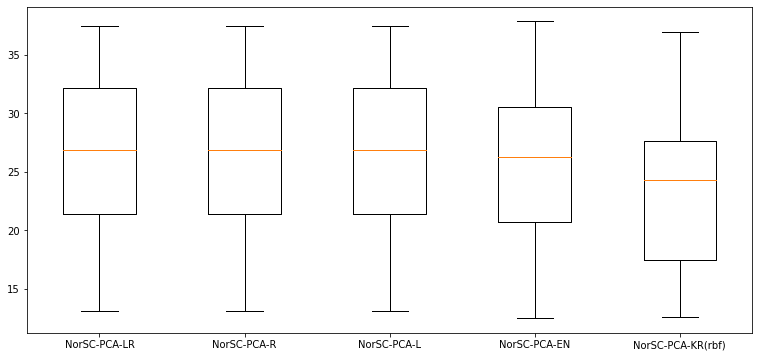

In [13]:
plt.figure(figsize=[13,6])
plt.boxplot(maev)
plt.xticks(ticks=np.arange(len(steps))+1, labels=label_model)
#plt.grid()
plt.show()

Hyperparametros ganadores por modelo Entrenan cada modelo sobre toda la base de datos

Cuantos contagiados vamos a tener mañana abr 24?

$$NorSC-KRRBF: \gamma=xxx, \alpha=XXX$$

$$pipeline =[SC, KR(rbf, gamma=xxx, alpha=xxx)]$$

model23abrSCKRRBF= fit(X,y) sobre todos los datos con hyperparametros moda del outter loop

y23abr = model23abrSCKRRBF.predict(X[-1])

#### Modelo Ganador



In [14]:
mae_win

[27.426616630480453,
 27.7211588147215,
 12.487150944583663,
 16.86879643641118,
 36.94262281059582,
 25.007149296414994,
 12.607730233869612,
 27.198929903593832,
 19.05417524960002,
 23.189094940384873]

In [15]:
min=1e10
pos_min = 0
for i in range (len(mae_win)):
    if (mae_win[i] < min):
        min = mae_win[i]
        pos_min = i

In [16]:
print(win_estimators[pos_min])
print(win_hyperparams[pos_min])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}


#### Entrenamiento de todo el set de datos con el Regresor ganador

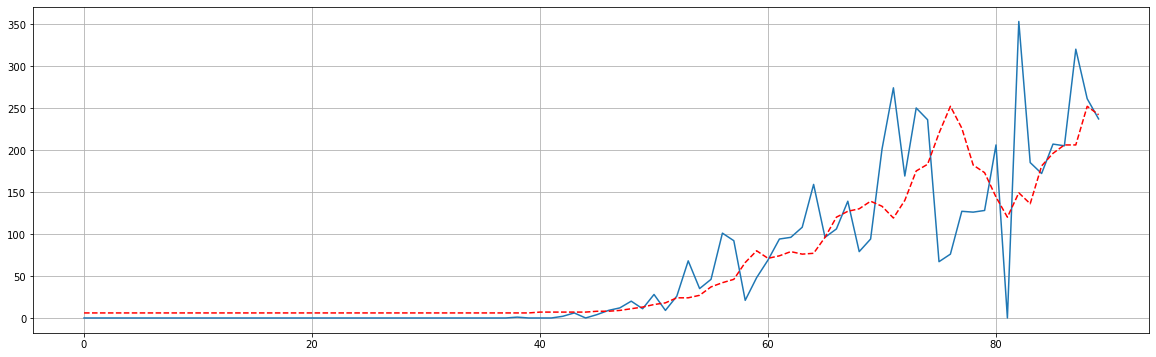

In [17]:
#for j in range (len(best_estimators)):

model_covid = win_estimators[pos_min].fit(X_d,y_d)

y_pred = model_covid.predict(X_d)
y_pred_1 = []
for i in range (len(X_d)):
    y_pred_1.append(int(y_pred[i]))

plt.figure(figsize=[20,6])
plt.plot(y_d)
plt.plot(y_pred_1,'r--')
plt.grid()

In [19]:
int(model_covid.predict(X_d[-2:-1]))

252

#### Guardar el modelo Obtenido 

In [20]:
# Guardar datos
savedata1 = {
    'mae':min,
    'best_model': win_estimators[pos_min],
    'best_parameters': win_hyperparams[pos_min]
}
dump(savedata1,'win_regressor_per_day.joblib')

['win_regressor_per_day.joblib']

Mejor modelo obtenido de un entrenamiento anterior con datos hasta el '04/22/20'

C:\Users\dario\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


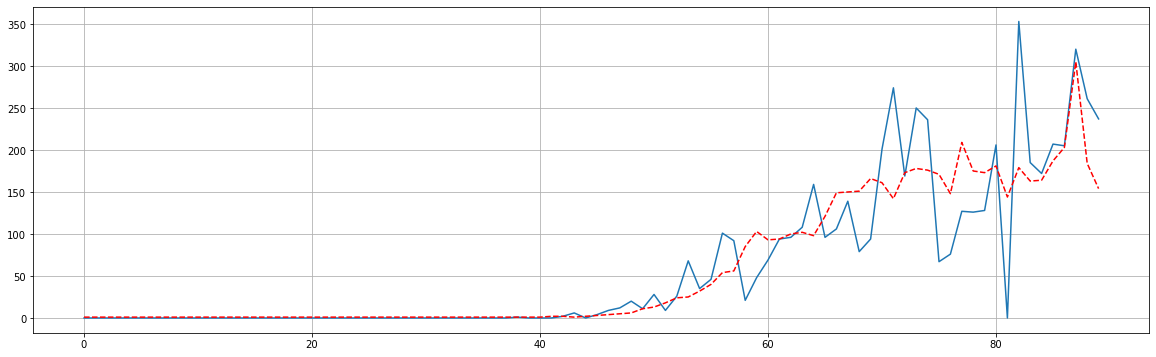

In [21]:
from sklearn.externals import joblib # Save Model
model_covid_1 = joblib.load('win_regressor_04_22_20.joblib')  
model = model_covid_1.get('best_model').fit(X_d,y_d)

y_pred = model.predict(X_d)
y_pred_1 = []
for i in range (len(X_d)):
    y_pred_1.append(int(y_pred[i]))

plt.figure(figsize=[20,6])
plt.plot(y_d)
plt.plot(y_pred_1,'r--')
plt.grid()

In [22]:
model_covid_1.get('mae')

9.14771474709495

In [23]:
min

12.487150944583663

In [24]:
print('Predicción contagiados 28/04/20: ',int(model.predict(X_d[-2:-1])))

Predicción contagiados 28/04/20:  184


## Validación cruzada y anidada (pocos datos) - Contagios acumulados

In [25]:
'''StandardScaler() Estandarizar Cada columna de Xtrain centrada en 0 y con varianza 1
KernelRidge() Regresor
PCA() Análisis de componentes principales'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

steps = [[('scaler', StandardScaler()), 
          ('rep',PCA()),
         ('reg', LinearRegression())],
         
         [('scaler', StandardScaler()),
         ('rep',PCA()),
         ('reg',Ridge())],
         
         [('scaler', StandardScaler()),
         ('rep',PCA()),
         ('reg',Lasso())],
         
         [('scaler', StandardScaler()),
         ('rep',PCA()),
         ('reg',ElasticNet())],
         
         [('scaler', StandardScaler()),
          ('rep',PCA()),
         ('reg', KernelRidge(kernel='rbf'))] 
        ]

#parametros a buscar por busqueda por grilla
parameters =[{'rep__n_components' : [0.5,0.75,0.9],
             'reg__fit_intercept' : [True,False]},
             
             {'rep__n_components' : [0.5,0.75,0.9],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__tol' : [1e-5,1e-4,1e-3,1e-2,1e-1,1]},
             #'reg__solver' : ['svd','cholesky', 'lsqr','sparse_cg', 'sag', 'saga']},
             
             {'rep__n_components' : [0.5,0.75,0.9],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__warm_start' : [True,False],
             'reg__selection' : ['cyclic','random']},
             
             {'rep__n_components' : [0.5,0.75,0.9],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__l1_ratio' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__warm_start' : [True,False],
             'reg__selection' : ['cyclic','random']},
             
             {'rep__n_components': [0.5,0.75,0.9],
              'reg__gamma' : [1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha' : [1e-3,1e-2,1e-1,1,10,100]}]

label_model=['NorSC-PCA-LR', 'NorSC-PCA-R', 'NorSC-PCA-L', 'NorSC-PCA-EN', 'NorSC-PCA-KR(rbf)']
#label_model=['NorSC-PCA-LR', 'NorSC-PCA-L', 'NorSC-PCA-EN', 'NorSC-PCA-KR(rbf)']

In [26]:
#Validación cruzada y anidada
Niter = 10 # Numero de particiones del set de datos - cross validation
maev = np.zeros ( (Niter,len(steps)) ) # Mse para cada una de las particiones

best_estimators = [] # Mejor método por cada iteracion

''' Los hiperparametros son los grados de libertad que le puedo aportar a cada regresor  
para que, al momento de entrenar el set de datos, genere parametros generalizados
con el fin de que la prediccion sobre nuevos datos sea lo mas precisa y confiable posible.
Por lo tanto, los hiperparámetros son la clave del análisis de datos'''

best_hyperparams = [] # Mejores parámetros para ese método

min=0
be=steps[0]
bhp=parameters[0]

mae_win = []
win_estimators = []
win_hyperparams = []
    
#Ciclo para iterar particiones
for j in range (Niter): #outter loop
    
    #Particionar datos.
    X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)
    
    #Ciclo para evaluar todos los regresores en iteracipon j del outter loop 
    for r in range (len(steps)):

        grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r], cv=5, verbose=10, scoring='neg_mean_absolute_error', n_jobs=5) # cv = inner loop 
        grid_search.fit(X_train, y_train) # Generar mejor modelo 

        y_pred = grid_search.best_estimator_.predict(X_test) # Estimar salida del set Test

        # Guardar mejor modelo
        best_estimators.append(grid_search.best_estimator_)
        best_hyperparams.append(grid_search.best_params_)

        # Guardar acierto
        maev[j,r] = mae(y_test, y_pred)
        
        if (r == 0):
            min = maev[j,r]
            be = grid_search.best_estimator_
            whp = grid_search.best_params_
        if (maev[j,r] < min):
            min = maev[j,r]
            be = grid_search.best_estimator_
            whp = grid_search.best_params_

        print('it %d/%d - Modelo %d/%d'%(j+1,Niter,r+1,len(steps))) # Imprimir iteracion
        print(grid_search.best_estimator_)
        print(grid_search.best_params_) # Imprimir mejores parámetros
        print('mae: ', maev[j,r]) # Imprimir mse

        # Guardar datos
        savedata = {
            'mse':maev,
            'best_models': best_estimators,
            'best_parameters': best_hyperparams
        }
        dump(savedata,'covid19_1.joblib')
        
    win_estimators.append(be)
    win_hyperparams.append(whp)
    mae_win.append(min)
    print('__________________________________________________________________')
    print ('estimador con menor error absoluto para it %d/%d: '%(j+1,Niter))
    print(be) 
    print('Mejores hyperparametros: ')
    print(whp)
    print('__________________________________________________________________')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 1/10 - Modelo 1/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
{'reg__fit_intercept': True, 'rep__n_components': 0.5}
mae:  89.78386419561582
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0270s.) Setting batch_size=14.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8

it 1/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  89.78486765515949
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1600s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.0001,
                       warm_start=True))],
         verbose=False)
{'reg__alpha': 10, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  91.01589287910875
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1388s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 198 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 504 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 810 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 1184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 1558 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.5s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are u

it 1/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=10, copy_X=True, fit_intercept=True,
                            l1_ratio=1, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 10, 'reg__l1_ratio': 1, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  91.01589287910875
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1498s.) Setting batch_size=36.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 222 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 366 out of 540 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0260s.) Setting batch_size=14.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 1/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  33.12158231853068
__________________________________________________________________
estimador con menor error absoluto para it 1/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=

[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1440s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | 

it 2/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  91.69544105416199
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1413s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 2/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  91.6946252535371
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1550s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 460 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 730 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 1060 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1390 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 1780 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 2/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=10, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 10, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  91.10373326077782
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1310s.) Setting batch_size=36.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 202 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0280s.) Setting 

it 2/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  35.37258218047322
__________________________________________________________________
estimador con menor error absoluto para it 2/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=No

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1470s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | 

it 3/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  125.96562981853013
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1510s.) Setting batch_size=36.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0210s.) Setting batch_size=18.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 3/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  125.96418451401061
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1990s.) Setting batch_size=36.
[Parallel(n_jobs=5)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 262 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 586 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 910 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 1306 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 1702 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.5s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0270s.) Setting batch_size=14.
[Parallel(n_jobs=

it 3/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=10, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 10, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  124.91693232237114
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1770s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  80 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 210 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | 

it 3/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  54.9065766341268
__________________________________________________________________
estimador con menor error absoluto para it 3/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=N

[Parallel(n_jobs=5)]: Batch computation too fast (0.0860s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0760s.) Setting batch_size=20.
[Parallel(n_jobs=5)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 270 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 4/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  88.00317280263648
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1530s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | el

it 4/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  88.00191252388342
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1460s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 770 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 1122 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 1474 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 1890 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.8s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
                            l1_ratio=10, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__l1_ratio': 10, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  86.762195875085
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0390s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1570s.) Setting batch_size=24.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 158 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.8s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s

it 4/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  34.40538438770576
__________________________________________________________________
estimador con menor error absoluto para it 4/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=No

[Parallel(n_jobs=5)]: Batch computation too fast (0.0350s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1270s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s

it 5/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  86.32196008049141
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1510s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 5/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  86.32191082528567
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1620s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 186 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 438 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 690 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 998 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 1306 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 1670 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.3s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation

it 5/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  85.92212488537945
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1310s.) Setting batch_size=36.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 202 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0300s.) Setting batch_size=12.


it 5/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  37.23989646145694
__________________________________________________________________
estimador con menor error absoluto para it 5/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=No

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1440s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | 

it 6/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  128.0329647044842
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1450s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.5s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 6/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  128.03365138377788
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1620s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 186 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 438 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 690 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 998 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1306 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 1670 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 

it 6/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  134.20978274339657
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1750s.) Setting batch_size=26.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 182 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s re

it 6/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  50.58658124142635
__________________________________________________________________
estimador con menor error absoluto para it 6/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=No

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0350s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1480s.) Setting batch_size=26.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting 

it 7/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  92.02197544312979
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1520s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 7/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  92.02116576474025
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1570s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 460 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 730 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 1060 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1390 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 1780 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with

it 7/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
                            l1_ratio=10, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.01, 'reg__l1_ratio': 10, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  86.06666590488346
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1630s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 186 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0250s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s re

it 7/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}
mae:  15.676781335881818
__________________________________________________________________
estimador con menor error absoluto para it 7/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None,

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0340s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1410s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting 

it 8/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  73.36852186419135
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1530s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0360s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 8/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  73.36745891762615
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1390s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 670 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 978 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 1286 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 1650 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation

it 8/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=10, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 10, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  72.59713769211857
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1580s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 8/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  21.715746028456326
__________________________________________________________________
estimador con menor error absoluto para it 8/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=N

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0370s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1430s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  86.84575917800268
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0320s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1500s.) Setting batch_size=30.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.4s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 9/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  86.8471223722459
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1350s.) Setting batch_size=34.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 198 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 504 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 810 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 1184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 1558 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.9s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be 

it 9/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  98.13476768456431
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1778s.) Setting batch_size=26.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 182 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.7s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  30 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   9 out of  30 | elapsed:    0.0s re

it 9/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.01,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.01, 'rep__n_components': 0.5}
mae:  54.841605487410156
__________________________________________________________________
estimador con menor error absoluto para it 9/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0310s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1480s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.6s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


it 10/10 - Modelo 2/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=1e-05))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__tol': 1e-05, 'rep__n_components': 0.5}
mae:  122.32406849388184
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0350s.) Setting batch_size=10.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1390s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 166 out of 360 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    0.5s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10 - Modelo 3/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  122.3240556924162
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0330s.) Setting batch_size=12.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1600s.) Setting batch_size=28.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 186 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 690 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 998 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1306 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 1670 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 2160 out of 2160 | elapsed:    2.8s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.2

it 10/10 - Modelo 4/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=100, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001, warm_start=True))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__l1_ratio': 100, 'reg__selection': 'cyclic', 'reg__warm_start': True, 'rep__n_components': 0.5}
mae:  130.92242056917232
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1540s.) Setting batch_size=24.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 158 tasks      | elapsed:    0.5s


it 10/10 - Modelo 5/5
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae:  47.30614632857214
__________________________________________________________________
estimador con menor error absoluto para it 10/10: 
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=

[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    0.8s finished
C:\Users\dario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


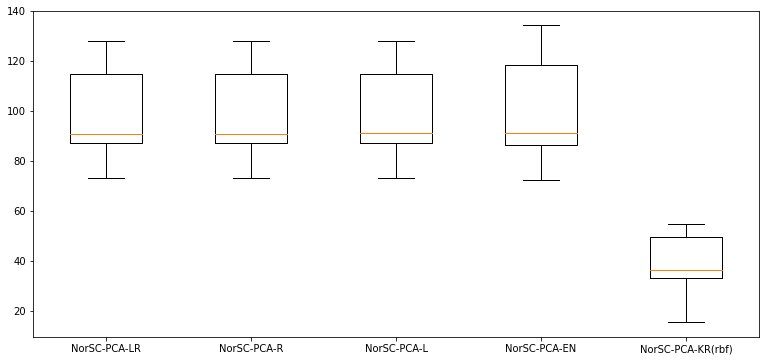

In [27]:
plt.figure(figsize=[13,6])
plt.boxplot(maev)
plt.xticks(ticks=np.arange(len(steps))+1, labels=label_model)
#plt.grid()
plt.show()

Hyperparametros ganadores por modelo Entrenan cada modelo sobre toda la base de datos

Cuantos contagiados vamos a tener mañana abr 24?

$$NorSC-KRRBF: \gamma=xxx, \alpha=XXX$$

$$pipeline =[SC, KR(rbf, gamma=xxx, alpha=xxx)]$$

model23abrSCKRRBF= fit(X,y) sobre todos los datos con hyperparametros moda del outter loop

y23abr = model23abrSCKRRBF.predict(X[-1])

#### Modelo Ganador



In [28]:
mae_win

[33.12158231853068,
 35.37258218047322,
 54.9065766341268,
 34.40538438770576,
 37.23989646145694,
 50.58658124142635,
 15.676781335881818,
 21.715746028456326,
 54.841605487410156,
 47.30614632857214]

In [29]:
min=1e10
pos_min = 0
for i in range (len(mae_win)):
    if (mae_win[i] < min):
        min = mae_win[i]
        pos_min = i

In [30]:
print(win_estimators[pos_min])
print(win_hyperparams[pos_min])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rep',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=1,
                             kernel='rbf', kernel_params=None))],
         verbose=False)
{'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}


#### Entrenamiento de todo el set de datos con el Regresor ganador

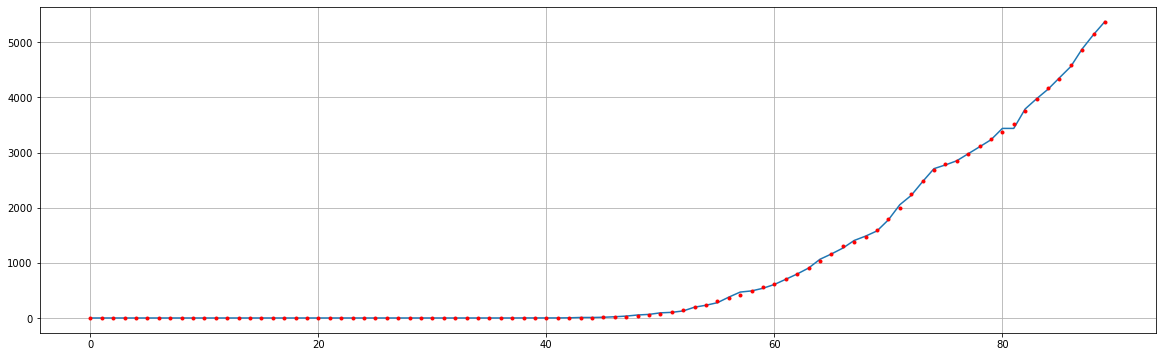

In [33]:
#for j in range (len(best_estimators)):

model_covid = win_estimators[pos_min].fit(X,y)

y_pred = model_covid.predict(X)
y_pred_1 = []
for i in range (len(X_d)):
    y_pred_1.append(int(y_pred[i]))

plt.figure(figsize=[20,6])
plt.plot(y)
plt.plot(y_pred_1,'r.')
plt.grid()

In [36]:
int(model_covid.predict(X[-2:-1]))

5160

#### Guardar el modelo Obtenido 

In [37]:
# Guardar datos
savedata1 = {
    'mae':min,
    'best_model': win_estimators[pos_min],
    'best_parameters': win_hyperparams[pos_min]
}
dump(savedata1,'win_regressor_accum.joblib')

['win_regressor_accum.joblib']

Mejor modelo obtenido de un entrenamiento anterior con datos hasta el '04/22/20'

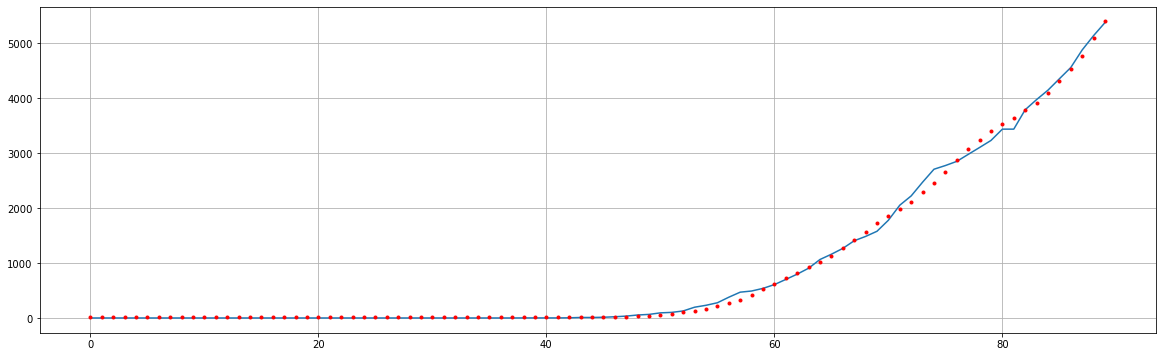

In [43]:
from sklearn.externals import joblib # Save Model
model_covid_1 = joblib.load('win_regressor_04_22_20.joblib')  
model = model_covid_1.get('best_model').fit(X,y)

y_pred = model.predict(X)
y_pred_1 = []
for i in range (len(X)):
    y_pred_1.append(int(y_pred[i]))

plt.figure(figsize=[20,6])
plt.plot(y)
plt.plot(y_pred_1,'r.')
plt.grid()

In [40]:
model_covid_1.get('mae')

9.14771474709495

In [41]:
min

15.676781335881818

In [42]:
print('Predicción contagiados 28/04/20: ',int(model.predict(X[-2:-1])))

Predicción contagiados 28/04/20:  5091
